In [5]:
!pip install -U ruamel-yaml
!pip install -U app-store-scraper
!pip install -U tzlocal

     |████████████████████████████████| 108 kB 17.3 MB/s eta 0:00:01
     |████████████████████████████████| 552 kB 49.2 MB/s eta 0:00:01


In [1]:
%matplotlib inline

import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sys 

# for building in wait times
import random
import time

# for keeping track of timing
import datetime as dt

# for scraping app reviews from App Store
from app_store_scraper import AppStore

# for pretty printing data structures
from pprint import pprint
from tzlocal import get_localzone

## Scrape App Store reviews using the app_store_scraper library

Homepage: https://github.com/cowboy-bebug/app-store-scraper

---

In [2]:
## Instantiate App Store class for desired app
app_ = AppStore(
    country='ph',        # required, 2-letter code
    app_name='gcash',    # required, found in app's url
    app_id=520020791     # required, found in app's url
) 
    
app_.review(
    how_many=10000, # upperbound limit
    after=dt.datetime(2019, 12, 31),
    sleep=random.randint(2, 3)
)

2021-06-29 07:13:48,594 [INFO] Base - Initialised: AppStore('ph', 'gcash', 520020791)
2021-06-29 07:13:48,595 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/ph/app/gcash/id520020791
2021-06-29 07:13:54,843 [INFO] Base - [id:520020791] Fetched 21 reviews (21 fetched in total)
2021-06-29 07:14:04,131 [INFO] Base - [id:520020791] Fetched 49 reviews (49 fetched in total)
2021-06-29 07:14:13,483 [INFO] Base - [id:520020791] Fetched 80 reviews (80 fetched in total)
2021-06-29 07:14:22,888 [INFO] Base - [id:520020791] Fetched 104 reviews (104 fetched in total)
2021-06-29 07:14:32,101 [INFO] Base - [id:520020791] Fetched 137 reviews (137 fetched in total)
2021-06-29 07:14:41,284 [INFO] Base - [id:520020791] Fetched 166 reviews (166 fetched in total)
2021-06-29 07:14:50,465 [INFO] Base - [id:520020791] Fetched 197 reviews (197 fetched in total)
2021-06-29 07:14:59,681 [INFO] Base - [id:520020791] Fetched 226 reviews (226 fetched in total)
2021-06-29 07:15:08,874 [INFO] Base -

## Data preprocessing
---

In [3]:
# reviews are stored as distionary objects
reviews = app_.reviews

# Convert list of dicts to Pandas DataFrame and write to csv
review_df = pd.DataFrame(reviews)
# review_df.to_csv('Data/' + app_name + '.csv', index=False)

In [4]:
review_df.sort_values(by=['date'])

,userName,review,isEdited,title,rating,date,developerResponse
1452,devicetimeprompt,Before i can use the app with adjusting the ti...,False,Why do this app has to be dependent on my phon...,1,2019-12-31 08:40:47,NaN
80,jazuming,Gcash is a great app BUT if you tried buying s...,False,Needs improvement,3,2020-01-01 02:10:56,NaN
2648,virient,ANDAMI NG VIDEOS SA YOUTUBE RIGHT NOW NA SCAM ...,False,GCASH IS A TOTAL SCAM,1,2020-01-01 11:26:33,NaN
424,mAsayapa,I cannot log in my email account to my gcash a...,False,Email registration error,3,2020-01-01 15:11:30,NaN
34,bambinusPHL,Been an avid user for a few years but recently...,False,Customer Support during issues is trash!,1,2020-01-01 19:14:19,NaN
...,...,...,...,...,...,...,...
468,annnooying,Can you put a feature where we can see our lim...,False,Limit,3,2021-06-27 11:57:55,NaN
2064,MotherRussiaComradez,very grate app i dont have credibility card an...,False,i love ot,1,2021-06-27 13:22:07,NaN
2651,69potato,U N R E L I A B L E,False,TRASH,1,2021-06-28 03:20:37,NaN
2650,kamote09,This app is not working properly and always lo...,False,Always log out user,1,2021-06-28 04:03:21,NaN


In [5]:
as_df = review_df.drop([1452])
as_df.sort_values(by=['date'])

,userName,review,isEdited,title,rating,date,developerResponse
80,jazuming,Gcash is a great app BUT if you tried buying s...,False,Needs improvement,3,2020-01-01 02:10:56,NaN
2648,virient,ANDAMI NG VIDEOS SA YOUTUBE RIGHT NOW NA SCAM ...,False,GCASH IS A TOTAL SCAM,1,2020-01-01 11:26:33,NaN
424,mAsayapa,I cannot log in my email account to my gcash a...,False,Email registration error,3,2020-01-01 15:11:30,NaN
34,bambinusPHL,Been an avid user for a few years but recently...,False,Customer Support during issues is trash!,1,2020-01-01 19:14:19,NaN
2034,Charmed one ako,Please keep up with 2020. It’s worse than dial...,False,2020 Outdate!,1,2020-01-02 01:43:34,NaN
...,...,...,...,...,...,...,...
468,annnooying,Can you put a feature where we can see our lim...,False,Limit,3,2021-06-27 11:57:55,NaN
2064,MotherRussiaComradez,very grate app i dont have credibility card an...,False,i love ot,1,2021-06-27 13:22:07,NaN
2651,69potato,U N R E L I A B L E,False,TRASH,1,2021-06-28 03:20:37,NaN
2650,kamote09,This app is not working properly and always lo...,False,Always log out user,1,2021-06-28 04:03:21,NaN


In [6]:
as_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2652 entries, 0 to 2652
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   userName           2652 non-null   object        
 1   review             2652 non-null   object        
 2   isEdited           2652 non-null   bool          
 3   title              2652 non-null   object        
 4   rating             2652 non-null   int64         
 5   date               2652 non-null   datetime64[ns]
 6   developerResponse  3 non-null      object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(4)
memory usage: 147.6+ KB


## Export App Store reviews dataframe as a csv file
---

In [7]:
as_df.to_csv('data/complete_app_store_reviews.csv', index=False)

In [10]:
# get all 1-star and 5-star reviews from the main dataframe and transfer them to a new one
filtered_df = as_df[(as_df.rating == 1) | (as_df.rating == 5)]
filtered_df.sort_values(by=['date'])

,userName,review,isEdited,title,rating,date,developerResponse
2648,virient,ANDAMI NG VIDEOS SA YOUTUBE RIGHT NOW NA SCAM ...,False,GCASH IS A TOTAL SCAM,1,2020-01-01 11:26:33,NaN
34,bambinusPHL,Been an avid user for a few years but recently...,False,Customer Support during issues is trash!,1,2020-01-01 19:14:19,NaN
2034,Charmed one ako,Please keep up with 2020. It’s worse than dial...,False,2020 Outdate!,1,2020-01-02 01:43:34,NaN
335,Purchased Premium,I tried so many times to cash in but it every ...,False,App refuses to let me cash in,1,2020-01-02 05:52:51,NaN
102,Ayakagin,I downloaded this app and registered last Mond...,False,Worthless,1,2020-01-02 08:15:18,NaN
...,...,...,...,...,...,...,...
743,foeverBK,Tha app does really good in eLoading and sendi...,False,Chat Support,1,2021-06-26 12:22:31,NaN
2064,MotherRussiaComradez,very grate app i dont have credibility card an...,False,i love ot,1,2021-06-27 13:22:07,NaN
2651,69potato,U N R E L I A B L E,False,TRASH,1,2021-06-28 03:20:37,NaN
2650,kamote09,This app is not working properly and always lo...,False,Always log out user,1,2021-06-28 04:03:21,NaN


In [11]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1729 entries, 0 to 2651
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   userName           1729 non-null   object        
 1   review             1729 non-null   object        
 2   isEdited           1729 non-null   bool          
 3   title              1729 non-null   object        
 4   rating             1729 non-null   int64         
 5   date               1729 non-null   datetime64[ns]
 6   developerResponse  1 non-null      object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(4)
memory usage: 96.2+ KB


## Export filtered App Store reviews dataframe as a csv file
---

In [12]:
filtered_df.to_csv('data/app_store_reviews.csv', index=False)

In [13]:
filtered_df = pd.read_csv('data/app_store_reviews.csv')

# convert 'date' column to datetime since dtypes aren't preserved in csv files
filtered_df['date'] = pd.to_datetime(as_df['date'])
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1729 entries, 0 to 1728
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   userName           1729 non-null   object        
 1   review             1729 non-null   object        
 2   isEdited           1729 non-null   bool          
 3   title              1729 non-null   object        
 4   rating             1729 non-null   int64         
 5   date               1728 non-null   datetime64[ns]
 6   developerResponse  1 non-null      object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(4)
memory usage: 82.9+ KB


## Data exploration
---

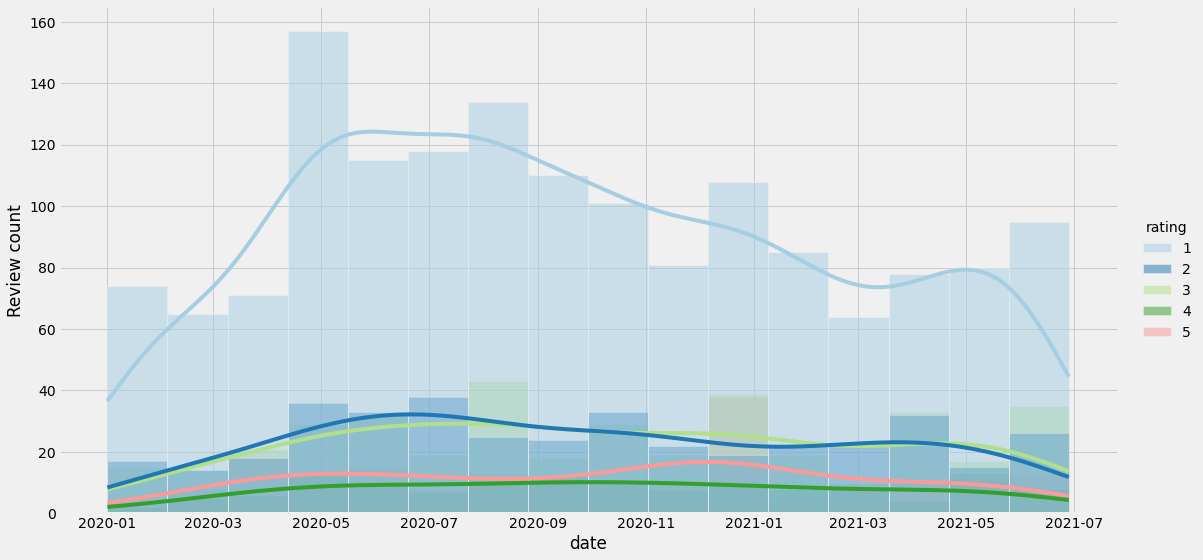

In [21]:
import matplotlib.dates as mdates

plt.style.use('fivethirtyeight')
# plt.figure(figsize=(10,8))

s = sns.displot(data=as_df, x='date', hue='rating', height=8, aspect=2, palette='Paired', kde=True)
s.set(ylabel='Review count')

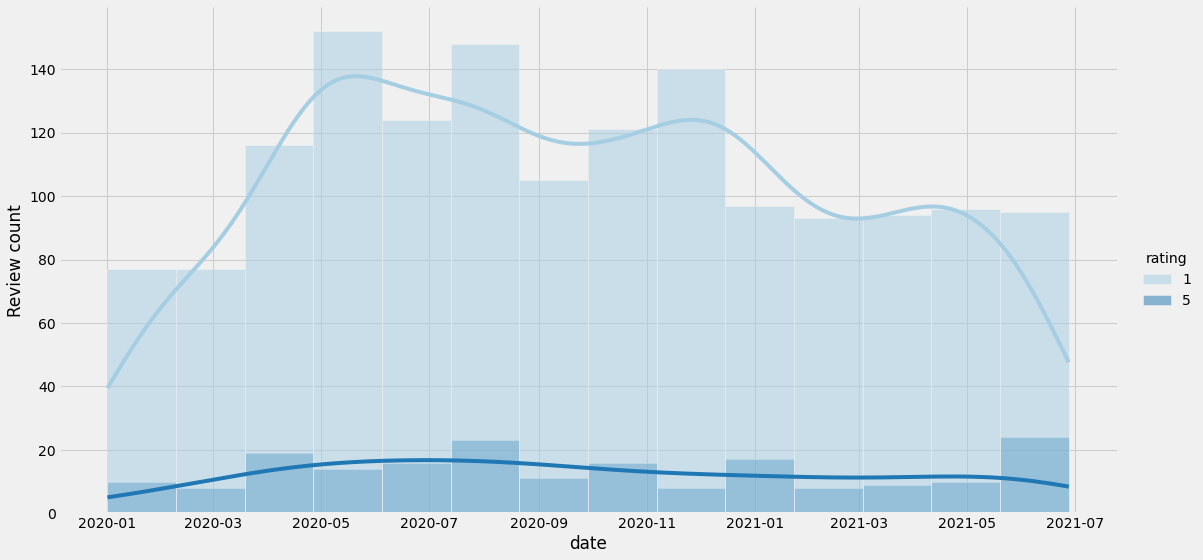

In [14]:
s = sns.displot(data=filtered_df, x='date', hue='rating', height=8, aspect=2, palette='Paired', kde=True)
s.set(ylabel='Review count')